In [1]:
from google.colab import files
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
uploaded=files.upload()
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

Saving train.csv to train.csv
Saving test.csv to test.csv


Q1.WHICH OCCUPATION IS THE RISKIEST?

<BarContainer object of 15751 artists>

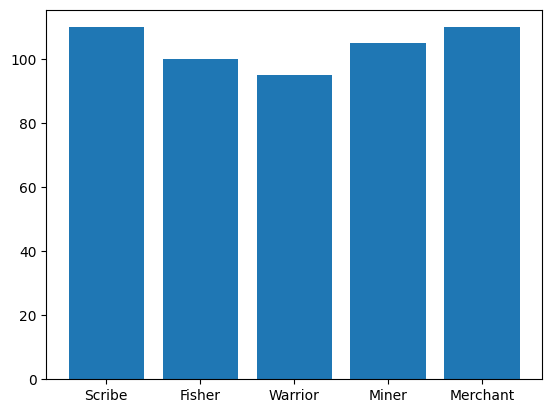

In [ ]:
plt.bar(train_df["Occupation"],train_df["Life_Expectancy"])

answer=Warrior has the riskiest job whereas a merchant's job is the safest

q2.Is there a significant correlation between HouseSize and Life Expectancy?

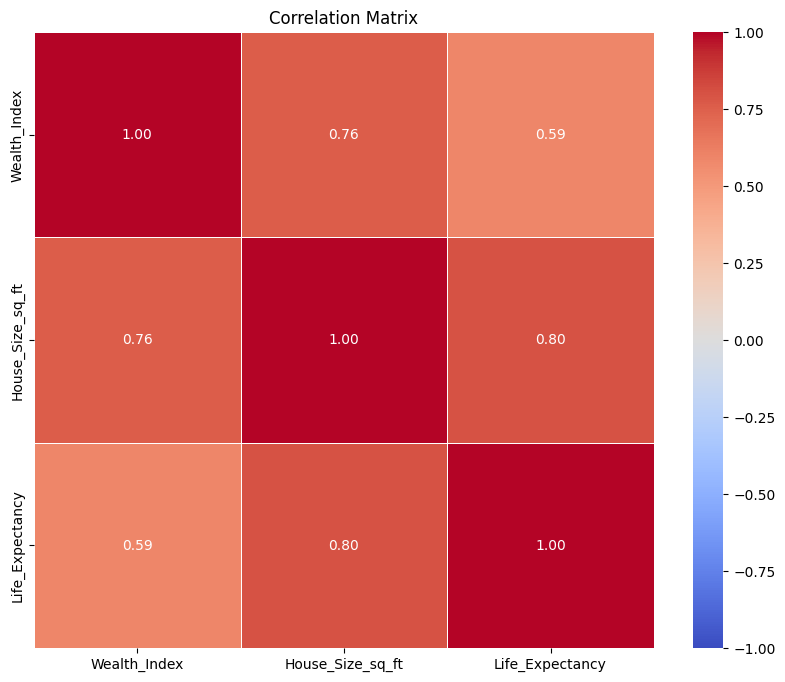

In [ ]:
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    vmin=-1, vmax=1
)

plt.title("Correlation Matrix")
plt.show()



answer=Yes,there is a significant relation betrween house size ,life expectancy and the wealth of a person.Richer people have bigger houses and they tend tend to live more due to more facilities

Q3.Compare the wealthiest district to the poorest district.
How many times wealthier is the average citizen in the richest
district compared to the poorest?

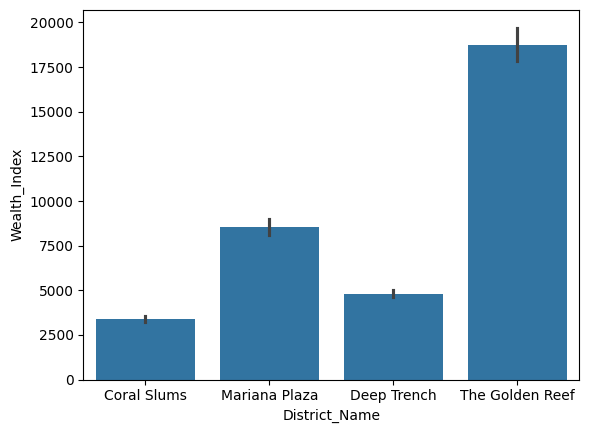

District_Name
The Golden Reef    18726.909656
Mariana Plaza       8535.553804
Deep Trench         4806.795825
Coral Slums         3371.414207
Name: Wealth_Index, dtype: float64


In [ ]:

sns.barplot(data=train_df,x="District_Name",y="Wealth_Index")
plt.show()
print(train_df.groupby("District_Name")["Wealth_Index"].mean().sort_values(ascending=False))


ANSWER= The Golden Reef is the wealthiest city whereas coral slums is the poorest.

Q4.Compare districts based on the highest percentage of
residents who commute out for work? How does this relate to
the occupation of the person?

In [ ]:

train_df['Is_Migrant'] = train_df['Work_District'] != train_df['District_Name']
district_mig_rates = train_df.groupby('District_Name')['Is_Migrant'].mean() * 100

occ_mig_rates = train_df.groupby(['District_Name', 'Occupation'])['Is_Migrant'].mean() * 100

for district in district_mig_rates.index:
    d_rate = district_mig_rates[district]
    print(f"District: {district} {d_rate:.1f}% migration")
    occupations = occ_mig_rates[district]
    for occupation, rate in occupations.items():
      print(f"    - {occupation}: {rate:.1f}% of them migrated")


District: Coral Slums 66.5% migration
    - Fisher: 70.7% of them migrated
    - Merchant: 90.8% of them migrated
    - Miner: 49.7% of them migrated
    - Scribe: 89.0% of them migrated
    - Warrior: 76.9% of them migrated
District: Deep Trench 63.3% migration
    - Fisher: 62.1% of them migrated
    - Merchant: 88.6% of them migrated
    - Miner: 70.1% of them migrated
    - Scribe: 91.6% of them migrated
    - Warrior: 47.7% of them migrated
District: Mariana Plaza 63.2% migration
    - Fisher: 89.8% of them migrated
    - Merchant: 60.8% of them migrated
    - Miner: 92.3% of them migrated
    - Scribe: 30.7% of them migrated
    - Warrior: 89.5% of them migrated
District: The Golden Reef 72.9% migration
    - Fisher: 75.7% of them migrated
    - Merchant: 61.2% of them migrated
    - Miner: 89.7% of them migrated
    - Scribe: 91.5% of them migrated
    - Warrior: 76.8% of them migrated


Q5.WHICH OCCUPATION IS THE HIGHEST PAYING AND WHICH IS THE LOWEST?

<Axes: xlabel='Occupation', ylabel='Wealth_Index'>

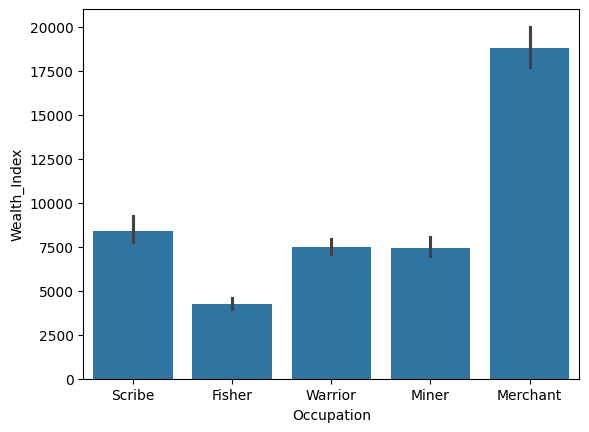

In [ ]:
sns.barplot(data=train_df,x="Occupation",y='Wealth_Index')

Answer= A merchant has the highest paying job whereas a fisher has the lowest paying job

Q6.Is there any relation between the Diet Type consumed and the Occupation of a person?

In [ ]:
district_counts = pd.crosstab(train_df['Diet_Type'], train_df['Occupation'])
print(district_counts)

Occupation      Fisher  Merchant  Miner  Scribe  Warrior
Diet_Type                                               
Exotic Imports    1057      1198    999     830     1125
Seafood           1029      1172   1004     860     1217
Seaweed           1050      1165   1025     831     1189


answer=No significant relation

In [ ]:
district_counts = pd.crosstab(train_df['District_Name'],train_df['Occupation'])
print(district_counts)


Occupation       Fisher  Merchant  Miner  Scribe  Warrior
District_Name                                            
Coral Slums         925       293   1275     308      325
Deep Trench        1419       516    458     486     1817
Mariana Plaza       314       306    324    1259      915
The Golden Reef     478      2420    971     468      474


Q7. Does the financial income of a person affect his/her
dietary impact?

<Axes: xlabel='Diet_Type', ylabel='Wealth_Index'>

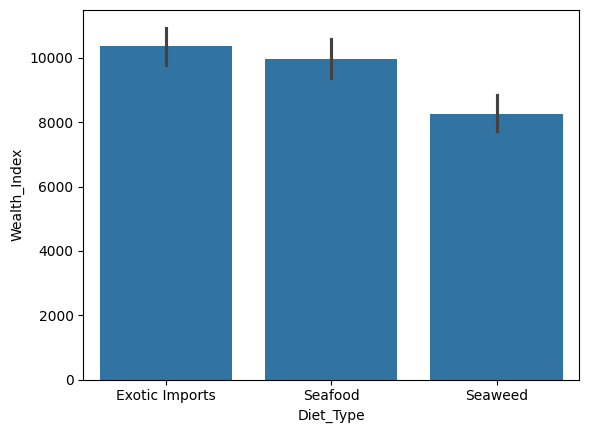

In [ ]:
sns.barplot(data=train_df,x="Diet_Type",y="Wealth_Index")

yes,rich people eat the exotic import whereas poor people eat the sea weeds

Q8.What is the significance of the bio-hash with respect tothe occupation?



** Answer=Its a unique hash given to each person for identification like the citizen .No significant relation with occupation according to me **

Q9.HOW IS WEALTH COUNT DISTRIBUTED(NO OF PEOPLE HAVING A SPECIFIC WEALTH INDEX)

<Axes: xlabel='Wealth_Index', ylabel='Count'>

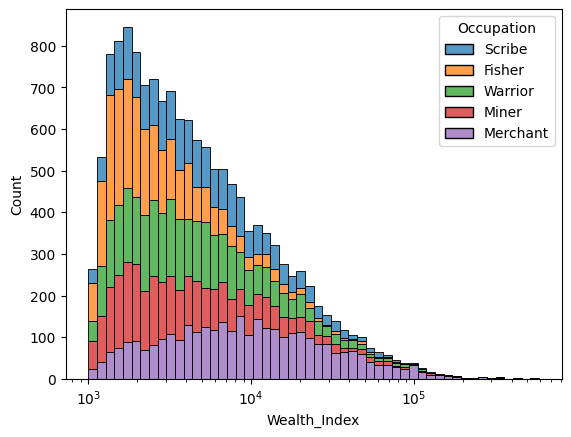

In [ ]:
sns.histplot(data=train_df,x="Wealth_Index" , hue='Occupation', multiple='stack', log_scale=True)

Wealth has a highly skewed distributiion

Q10.Does "Work_District" imply specific Occupation?

In [ ]:
pd.crosstab(train_df['Work_District'], train_df['Occupation'], normalize='columns')

Occupation,Fisher,Merchant,Miner,Scribe,Warrior
Work_District,,,,,
Coral Slums,0.298151,0.105233,0.505614,0.098770,0.202775
Deep Trench,0.390306,0.106931,0.291281,0.095200,0.498159
Mariana Plaza,0.096939,0.396888,0.101387,0.701706,0.096856
The Golden Reef,0.214605,0.390948,0.101717,0.104324,0.202209


yes,partly.Deep trench has a lot of fishers ,Coral Slums have a lot of miners and Mariana plaza has a lot of scribes

Q11. Is Age distributed differently per District?

<Axes: xlabel='Life_Expectancy', ylabel='Density'>

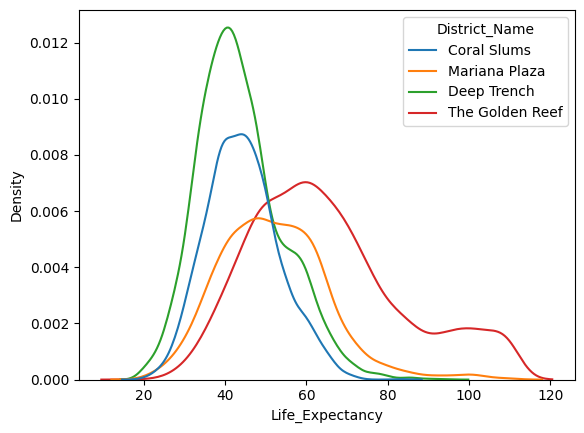

In [ ]:
sns.kdeplot(data=train_df, x='Life_Expectancy', hue='District_Name')

Yes,golden reef has a lot of rich people so they have a better life expectancy.Deep trench has a lot of warrios and fishers so there is a low life expectancy

Q12.Compare the vehicle ownership district wise.Is there any exceptionally high vehicles in any district?

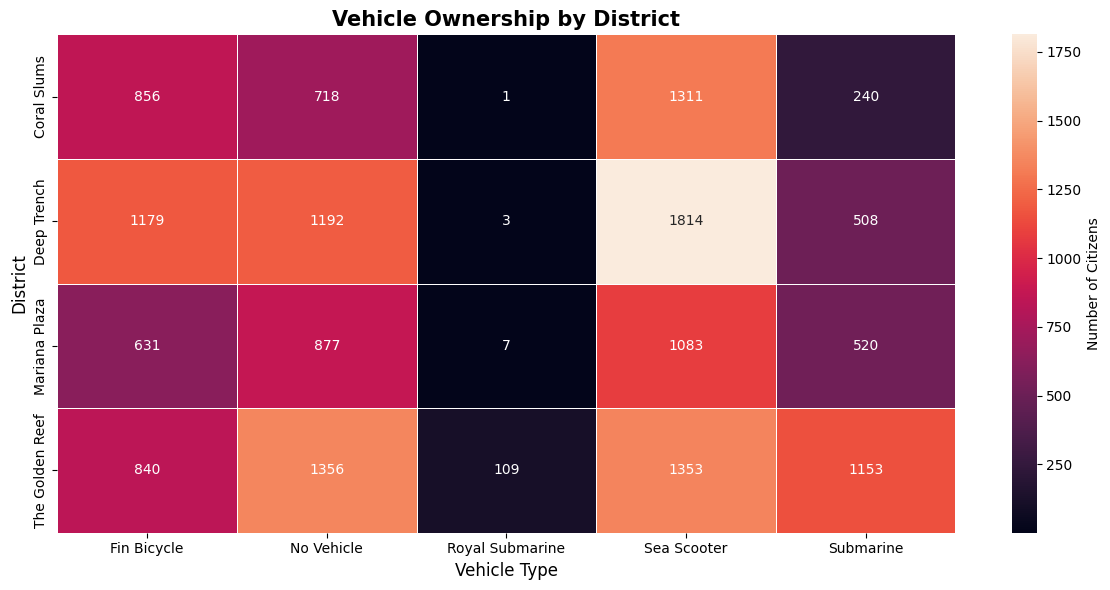

In [ ]:
vehicle_district_matrix = pd.crosstab(train_df['District_Name'], train_df['Vehicle_Owned'])

plt.figure(figsize=(12, 6))
sns.heatmap(vehicle_district_matrix,
            annot=True,
            fmt='d',
            linewidths=0.5,
            cbar_kws={'label': 'Number of Citizens'})

plt.title('Vehicle Ownership by District', fontsize=15, fontweight='bold')
plt.ylabel('District', fontsize=12)
plt.xlabel('Vehicle Type', fontsize=12)
plt.tight_layout()
plt.show()

**The Golden Reef has exceptionally high no. of submarines as they have all the richest ones

### Then we can also see that in all the cities most people have a seaa scooter.**

**ARE ALL OCCUPATION EQUALLY DISTRIBUTED OR THERE IS SOME IMBALANCE?**

In [5]:
train_df["Occupation"].value_counts()

,count
Occupation,
Merchant,3535
Warrior,3531
Fisher,3136
Miner,3028
Scribe,2521


THERE IS SOME IMBALANCE SURELY .SCRIBE ARE MINORITY WHEREAS MERCHANT AND WARRIOR HAVE THE HIGHEST COUNT SO OUR MODEL MAY FACE DIFFICULTY IN PREDICTING SCRIBE.